In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline

## Forge

In [2]:
X, y = mglearn.datasets.make_forge()
X.shape, y.shape

((26, 2), (26,))

In [3]:
X[:5]

array([[  9.96346605,   4.59676542],
       [ 11.0329545 ,  -0.16816717],
       [ 11.54155807,   5.21116083],
       [  8.69289001,   1.54322016],
       [  8.1062269 ,   4.28695977]])

In [4]:
y[:5]

array([1, 0, 1, 0, 0])

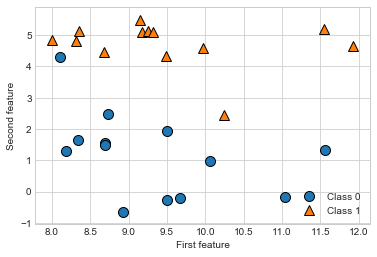

In [5]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"])
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

## Wave

In [6]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X.shape, y.shape

((40, 1), (40,))

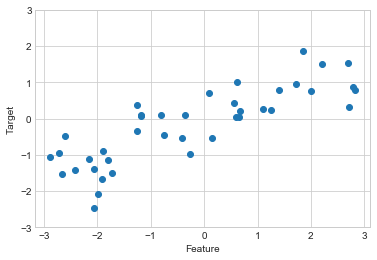

In [7]:
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

## Cancer

In [8]:
from sklearn.datasets import load_breast_cancer

In [9]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [10]:
cancer.data.shape

(569, 30)

In [11]:
cancer.target.shape

(569,)

In [13]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

In [12]:
cancer.target_names

array(['malignant', 'benign'],
      dtype='<U9')

In [14]:
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}

{'benign': 357, 'malignant': 212}

## Boston housing

In [16]:
from sklearn.datasets import load_boston

In [17]:
boston = load_boston()

In [18]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [19]:
boston.data.shape

(506, 13)

In [20]:
boston.target.shape

(506,)

In [21]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [22]:
X, y = mglearn.datasets.load_extended_boston()
X.shape, y.shape

((506, 104), (506,))

## KNN classifier

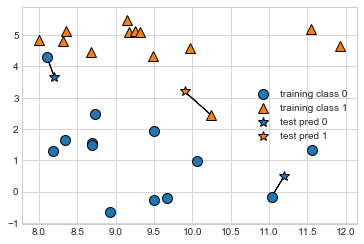

In [23]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

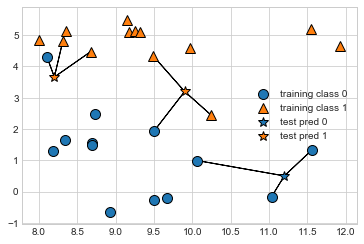

In [24]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

### Forge

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X, y = mglearn.datasets.make_forge()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
clf = KNeighborsClassifier(n_neighbors=3)

In [30]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [31]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [35]:
"Test accuracy: %.2f" % clf.score(X_test, y_test)

'Test accuracy: 0.86'

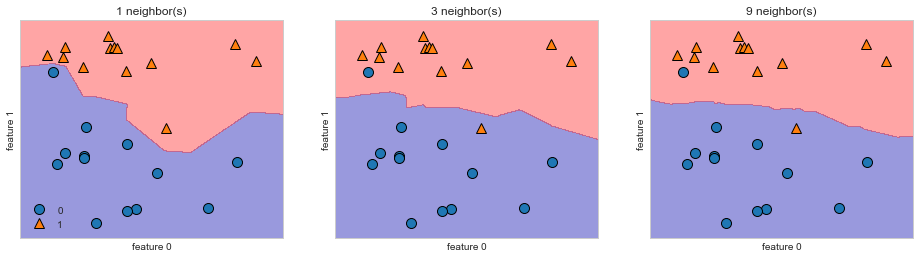

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

axes[0].legend(loc=3)
plt.show()

### Cancer

In [41]:
from sklearn.datasets import load_breast_cancer

In [42]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

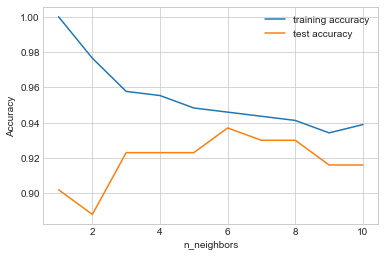

In [44]:
train_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11) # 1, 2 ... 10

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, train_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

## KNN regressor

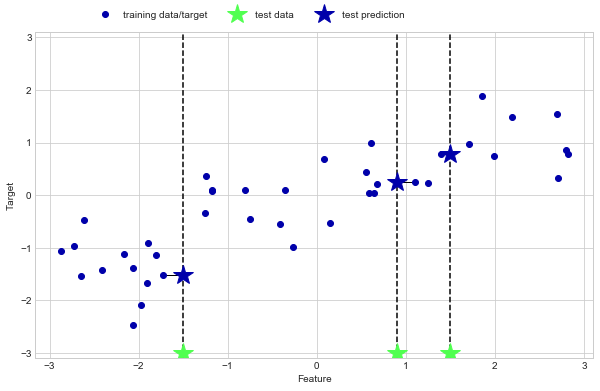

In [45]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

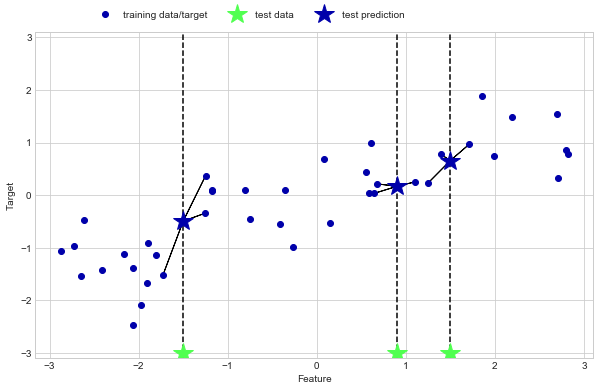

In [46]:
mglearn.plots.plot_knn_regression(n_neighbors=3)